# All companies creation by postal code

In [1]:
%run "../config/notebook.ipynb"
%run "../config/files.ipynb"

# load preparation from cache
FROM_CACHE=True

# import communes of the Haute-Garonne: will be imported while importing sirenes
# import the Insee staffing ranges
%run "../prepare/prepare_insee_staffing_ranges.ipynb"
# import Haute-Garonne sirenes
%run "../prepare/prepare_companies_sirene_registry.ipynb"
# import Haute-garonne map
%run "../prepare/prepare_map_hautegaronne_postalcodes.ipynb"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

%matplotlib inline

(from cache) df_staffing_ranges: 15 staffing ranges


(from cache) df_communes_haute_garonne: 586 communes
(from cache) df_sirenes: 598958 companies


(from cache) gdf_hautegaronne_postalcodes: 70 postalcodes


## Create the companies creation count  by postalcode dataframe 

#### Count by postal code

In [2]:
sr_companies_count_by_postal_code = df_sirenes.groupby(level='postalcode')['siren'].count()
sr_companies_count_by_postal_code.name = 'creation_class'

#### Classify by counts

In [3]:
STEP = 10000

def classify_creation(value):
    target = value // STEP
    return target

companies_creationclass_by_postalcode = sr_companies_count_by_postal_code.apply(classify_creation)

## Create the geodataframe

In [4]:
gdf_hautegaronne_postalcodes_companies_creation = gdf_hautegaronne_postalcodes.merge(companies_creationclass_by_postalcode, left_on='ID', right_on='postalcode')

### Display the all times map

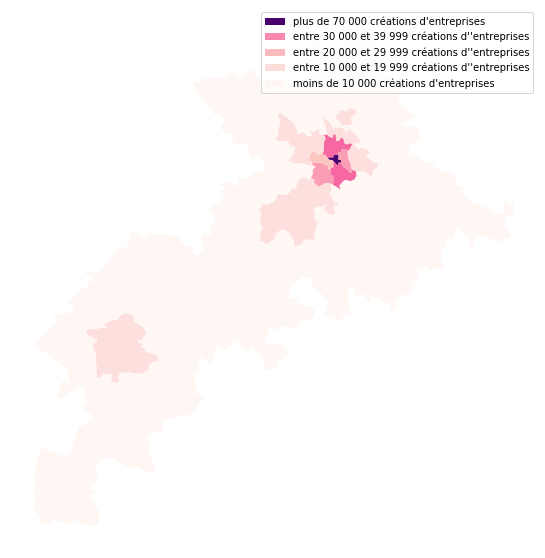

In [5]:
ax = gdf_hautegaronne_postalcodes_companies_creation.plot(figsize=(10,10),column='creation_class', cmap='RdPu')
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

legends = [Patch(facecolor='#49006a', label="plus de 70 000 créations d'entreprises"),
          Patch(facecolor='#f988ad', label="entre 30 000 et 39 999 créations d''entreprises"),
          Patch(facecolor='#fbbabd', label="entre 20 000 et 29 999 créations d''entreprises"),
          Patch(facecolor='#fdddd9', label="entre 10 000 et 19 999 créations d''entreprises"),
          Patch(facecolor='#fff7f3', label="moins de 10 000 créations d'entreprises")]

_ = ax.legend(handles=legends, loc='upper right')